In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
import os

In [18]:
df=pd.read_excel("data.xlsx")

In [19]:
df.head()

,Unnamed: 0,D/M/Y,H:M:S,CO,CH4,H2S,SPO2
0,0,2020-05-05,10:25:01,5.37,10496.41,15.45,98.0
1,1,2020-05-05,11:25:02,5.13,9721.47,5.73,98.0
2,2,2020-05-05,10:25:26,4.89,8707.83,5.17,98.0
3,3,2020-05-05,10:25:26,4.71,8045.35,4.67,98.0
4,4,2020-05-05,10:25:26,4.35,7040.90,4.25,98.0


In [20]:
df.isnull().sum()

Unnamed: 0        0
D/M/Y             0
H:M:S             0
CO                0
CH4               0
H2S           50640
SPO2          25233
dtype: int64

In [21]:
df.shape

(53566, 7)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53566 entries, 0 to 53565
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  53566 non-null  int64         
 1   D/M/Y       53566 non-null  datetime64[ns]
 2   H:M:S       53566 non-null  object        
 3   CO          53566 non-null  float64       
 4   CH4         53566 non-null  float64       
 5   H2S         2926 non-null   float64       
 6   SPO2        28333 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 2.9+ MB


In [23]:
df['D/M/Y'] = df['D/M/Y'].dt.strftime('%Y-%m-%d')

In [24]:
def check_type(data):
    if type(data) is str:
        return data
    else:
        return data.strftime("%H:%M:%S")

In [25]:
df['H:M:S'] = df['H:M:S'].apply(lambda x: check_type(x))

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53566 entries, 0 to 53565
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53566 non-null  int64  
 1   D/M/Y       53566 non-null  object 
 2   H:M:S       53566 non-null  object 
 3   CO          53566 non-null  float64
 4   CH4         53566 non-null  float64
 5   H2S         2926 non-null   float64
 6   SPO2        28333 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 2.9+ MB


In [27]:
df.head()

,Unnamed: 0,D/M/Y,H:M:S,CO,CH4,H2S,SPO2
0,0,2020-05-05,10:25:01,5.37,10496.41,15.45,98.0
1,1,2020-05-05,11:25:02,5.13,9721.47,5.73,98.0
2,2,2020-05-05,10:25:26,4.89,8707.83,5.17,98.0
3,3,2020-05-05,10:25:26,4.71,8045.35,4.67,98.0
4,4,2020-05-05,10:25:26,4.35,7040.90,4.25,98.0


In [28]:
t=df.iloc[1,2]

In [29]:
type(t)

str

In [30]:
df['DateTime']=df['D/M/Y']+' '+df["H:M:S"]

In [31]:
df.head()

,Unnamed: 0,D/M/Y,H:M:S,CO,CH4,H2S,SPO2,DateTime
0,0,2020-05-05,10:25:01,5.37,10496.41,15.45,98.0,2020-05-05 10:25:01
1,1,2020-05-05,11:25:02,5.13,9721.47,5.73,98.0,2020-05-05 11:25:02
2,2,2020-05-05,10:25:26,4.89,8707.83,5.17,98.0,2020-05-05 10:25:26
3,3,2020-05-05,10:25:26,4.71,8045.35,4.67,98.0,2020-05-05 10:25:26
4,4,2020-05-05,10:25:26,4.35,7040.90,4.25,98.0,2020-05-05 10:25:26


In [32]:
df.columns

Index(['Unnamed: 0', 'D/M/Y', 'H:M:S', 'CO', 'CH4', 'H2S', 'SPO2', 'DateTime'], dtype='object')

In [33]:
df.drop(['Unnamed: 0', 'D/M/Y', 'H:M:S','CO', 'H2S', 'SPO2'],inplace=True,axis=1)

In [34]:
df

,CH4,DateTime
0,10496.41,2020-05-05 10:25:01
1,9721.47,2020-05-05 11:25:02
2,8707.83,2020-05-05 10:25:26
3,8045.35,2020-05-05 10:25:26
4,7040.90,2020-05-05 10:25:26
...,...,...
53561,623.83,2020-05-05 18:9:58
53562,636.54,2020-05-05 18:9:59
53563,613.43,2020-05-05 18:09:06
53564,613.43,2020-05-05 18:09:07


In [35]:
df.isnull().sum()

CH4         0
DateTime    0
dtype: int64

In [36]:
df['DateTime'] = pd.to_datetime(df['DateTime'],errors='coerce', format='%Y-%m-%d %H:%M:%S')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53566 entries, 0 to 53565
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   CH4       53566 non-null  float64       
 1   DateTime  53563 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 837.1 KB


In [38]:
df.head()

,CH4,DateTime
0,10496.41,2020-05-05 10:25:01
1,9721.47,2020-05-05 11:25:02
2,8707.83,2020-05-05 10:25:26
3,8045.35,2020-05-05 10:25:26
4,7040.90,2020-05-05 10:25:26


In [39]:
df.isnull().sum()

CH4         0
DateTime    3
dtype: int64

In [40]:
df.dropna(inplace=True)

In [41]:
df.isnull().sum()

CH4         0
DateTime    0
dtype: int64

In [42]:
df.shape

(53563, 2)

In [44]:
min(df['CH4'])

0.0

In [45]:
max(df['CH4'])

9965179900.0

In [46]:
np.std(df['CH4'])

68767411.89395455

In [47]:
np.average(df['CH4'])

1032823.3672415658

In [48]:
df1=df

In [49]:
df=df1

In [50]:
df.head()

,CH4,DateTime
0,10496.41,2020-05-05 10:25:01
1,9721.47,2020-05-05 11:25:02
2,8707.83,2020-05-05 10:25:26
3,8045.35,2020-05-05 10:25:26
4,7040.90,2020-05-05 10:25:26


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53563 entries, 0 to 53565
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   CH4       53563 non-null  float64       
 1   DateTime  53563 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.2 MB


In [52]:
df['CH4'][df['CH4']>5000]=5000

/var/folders/p5/43_fhp1s30z3w0n_dtmwxmvm0000gn/T/ipykernel_1863/2930956235.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CH4'][df['CH4']>5000]=5000


In [53]:
df.head()

,CH4,DateTime
0,5000.0,2020-05-05 10:25:01
1,5000.0,2020-05-05 11:25:02
2,5000.0,2020-05-05 10:25:26
3,5000.0,2020-05-05 10:25:26
4,5000.0,2020-05-05 10:25:26


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53563 entries, 0 to 53565
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   CH4       53563 non-null  float64       
 1   DateTime  53563 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.2 MB


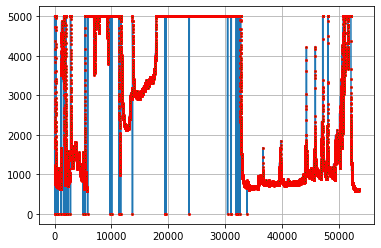

In [56]:

plt.grid()
plt.plot(df.CH4,marker="o", markersize=2, markeredgecolor="red",
markerfacecolor="green")
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CH4', ylabel='Density'>

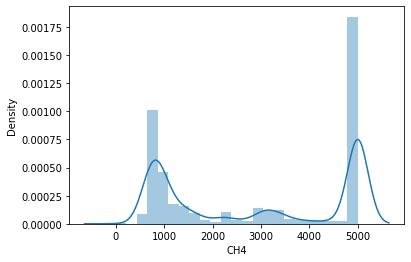

In [57]:
sns.distplot(df.CH4)

<AxesSubplot:xlabel='CH4', ylabel='count'>

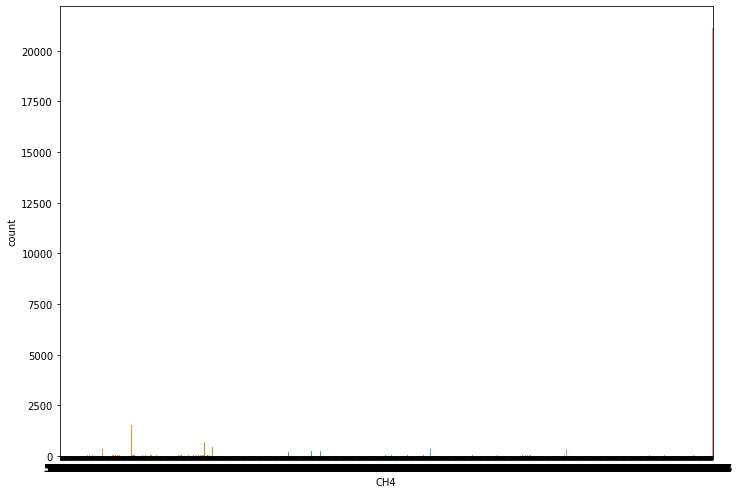

In [58]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(ax=ax, data=df, x='CH4')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CH4'>

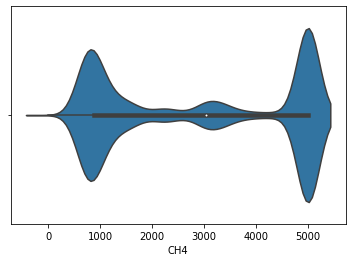

In [59]:
sns.violinplot(df.CH4)

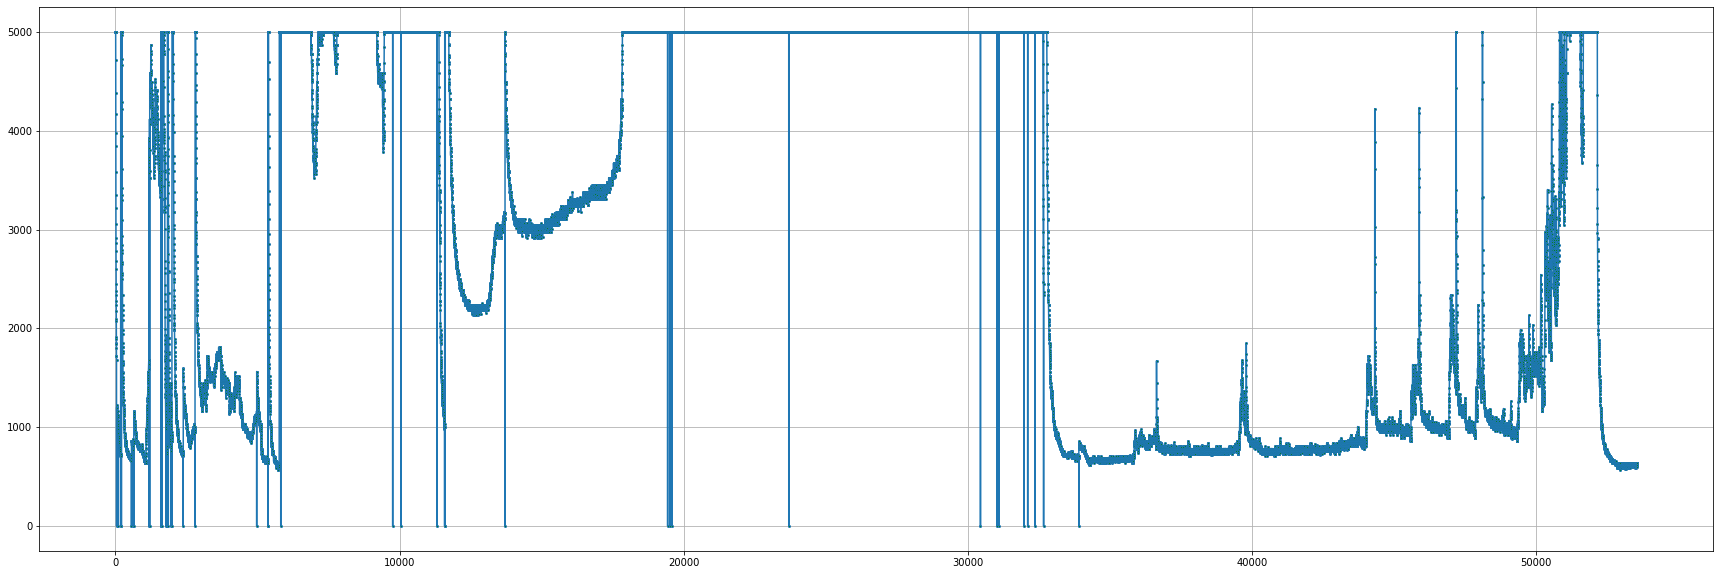

In [60]:
plt.figure(figsize=(30,10))
plt.grid()
plt.plot(df.CH4,marker="o", markersize=2,
markerfacecolor="green")
plt.show()

In [61]:
df.head()

,CH4,DateTime
0,5000.0,2020-05-05 10:25:01
1,5000.0,2020-05-05 11:25:02
2,5000.0,2020-05-05 10:25:26
3,5000.0,2020-05-05 10:25:26
4,5000.0,2020-05-05 10:25:26


In [62]:
df.tail()

,CH4,DateTime
53561,623.83,2020-05-05 18:09:58
53562,636.54,2020-05-05 18:09:59
53563,613.43,2020-05-05 18:09:06
53564,613.43,2020-05-05 18:09:07
53565,613.56,2020-05-05 18:09:09


In [63]:
df.DateTime.values

array(['2020-05-05T10:25:01.000000000', '2020-05-05T11:25:02.000000000',
       '2020-05-05T10:25:26.000000000', ...,
       '2020-05-05T18:09:06.000000000', '2020-05-05T18:09:07.000000000',
       '2020-05-05T18:09:09.000000000'], dtype='datetime64[ns]')

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53563 entries, 0 to 53565
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   CH4       53563 non-null  float64       
 1   DateTime  53563 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.2 MB


In [65]:
df = df.sort_values('DateTime')

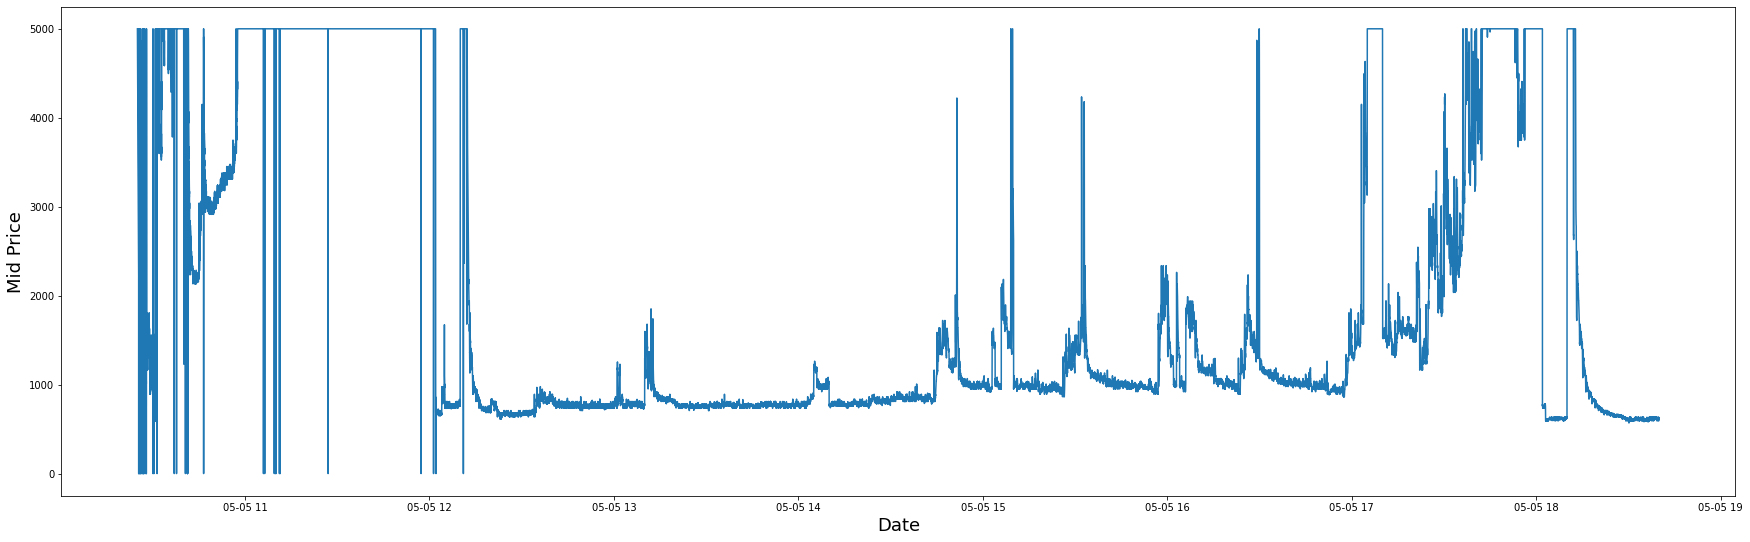

In [66]:
plt.figure(figsize = (30,9))
plt.plot(df["DateTime"],df['CH4'])
# plt.xticks(range(0,df.shape[0],5),df['DateTime'].loc[::5],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()

In [87]:
df.head()

,CO,DateTime
0,5.37,2020-05-05 10:25:01
24,2.45,2020-05-05 10:25:26
25,2.40,2020-05-05 10:25:26
26,2.35,2020-05-05 10:25:26
27,2.33,2020-05-05 10:25:26


In [67]:
scale=MinMaxScaler(feature_range = (0, 1))
df[['CH4']]=scale.fit_transform(df[['CH4']])

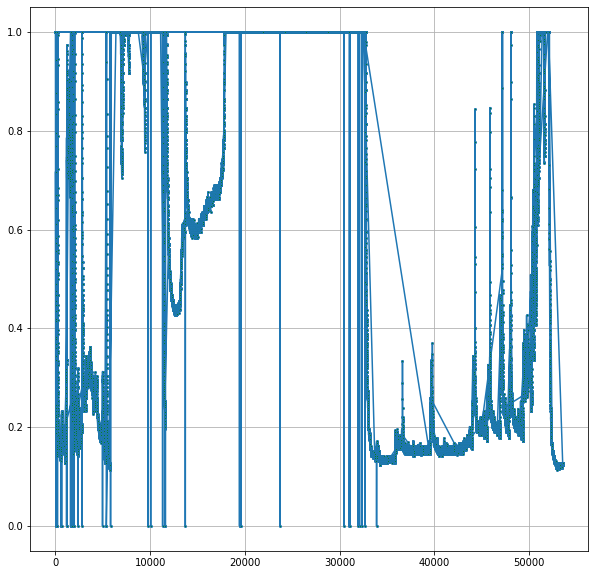

In [68]:
plt.figure(figsize=(10,10))
plt.grid()
plt.plot(df.CH4,marker="o", markersize=2,
markerfacecolor="green")
plt.show()

In [69]:
train_size = int(len(df) * 0.85)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

45528 8035


In [70]:
df.head()

,CH4,DateTime
0,1.000000,2020-05-05 10:25:01
24,0.490644,2020-05-05 10:25:26
25,0.476540,2020-05-05 10:25:26
26,0.467476,2020-05-05 10:25:26
27,0.455446,2020-05-05 10:25:26


In [71]:
from sklearn.preprocessing import RobustScaler

f_columns = ['DateTime']

f_transformer = RobustScaler()
cnt_transformer = RobustScaler()

f_transformer = f_transformer.fit(train[f_columns].to_numpy())
cnt_transformer = cnt_transformer.fit(train[['CH4']])

train.loc[:, f_columns] = f_transformer.transform(train[f_columns].to_numpy())
train['CH4'] = cnt_transformer.transform(train[['CH4']])

test.loc[:, f_columns] = f_transformer.transform(test[f_columns].to_numpy())
test['CH4'] = cnt_transformer.transform(test[['CH4']])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/var/folders/p5/43_fhp1s30z3w0n_dtmwxmvm0000gn/T/ipykernel_1863/4023914190.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['CH4'] = cnt_transformer.transform(train[['CH4']])
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/indexing.py:1835: Se

In [72]:

def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [73]:
time_steps = 10

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train, train.CH4, time_steps)
X_test, y_test = create_dataset(test, test.CH4, time_steps)

print(X_train.shape, y_train.shape)

(45518, 10, 2) (45518,)


In [74]:
tf.__version__

'2.8.0-rc0'

# LSTM 

In [75]:
#initialisizng the model 
model= keras.Sequential()

#First Input layer and LSTM layer with 0.2% dropout
model.add(keras.layers.LSTM(units=50,return_sequences=True,kernel_initializer='glorot_uniform',input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(keras.layers.Dropout(0.2))

# Where:
#     return_sequences: Boolean. Whether to return the last output in the output sequence, or the full sequence.

# Second LSTM layer with 0.2% dropout
model.add(keras.layers.LSTM(units=50,kernel_initializer='glorot_uniform',return_sequences=True))
model.add(keras.layers.Dropout(0.2))

#Third LSTM layer with 0.2% dropout
model.add(keras.layers.LSTM(units=50,kernel_initializer='glorot_uniform',return_sequences=True))
model.add(keras.layers.Dropout(0.2))

#Fourth LSTM layer with 0.2% dropout, we wont use return sequence true in last layers as we dont want to previous output
model.add(keras.layers.LSTM(units=50,kernel_initializer='glorot_uniform'))
model.add(keras.layers.Dropout(0.2))
#Output layer , we wont pass any activation as its continous value model
model.add(keras.layers.Dense(units=1))
model.compile(loss='mean_squared_error',optimizer='adam')

2022-05-24 14:42:26.193345: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [76]:
history = model.fit(
    X_train, y_train, 
    epochs=300, 
    batch_size=32, 
    validation_split=0.1,
    shuffle=False
)

Epoch 1/300
1281/1281 [==============================] - 31s 19ms/step - loss: 0.0124 - val_loss: 0.0050
Epoch 2/300
1281/1281 [==============================] - 23s 18ms/step - loss: 0.0092 - val_loss: 0.0064
Epoch 3/300
1281/1281 [==============================] - 23s 18ms/step - loss: 0.0067 - val_loss: 0.0084
Epoch 4/300
1281/1281 [==============================] - 23s 18ms/step - loss: 0.0055 - val_loss: 0.0073
Epoch 5/300
1281/1281 [==============================] - 23s 18ms/step - loss: 0.0048 - val_loss: 0.0104
Epoch 6/300
1281/1281 [==============================] - 23s 18ms/step - loss: 0.0047 - val_loss: 0.0128
Epoch 7/300
1281/1281 [==============================] - 23s 18ms/step - loss: 0.0048 - val_loss: 0.0096
Epoch 8/300
1281/1281 [==============================] - 23s 18ms/step - loss: 0.0049 - val_loss: 0.0063
Epoch 9/300
1281/1281 [==============================] - 23s 18ms/step - loss: 0.0046 - val_loss: 0.0064
Epoch 10/300
1281/1281 [==============================]

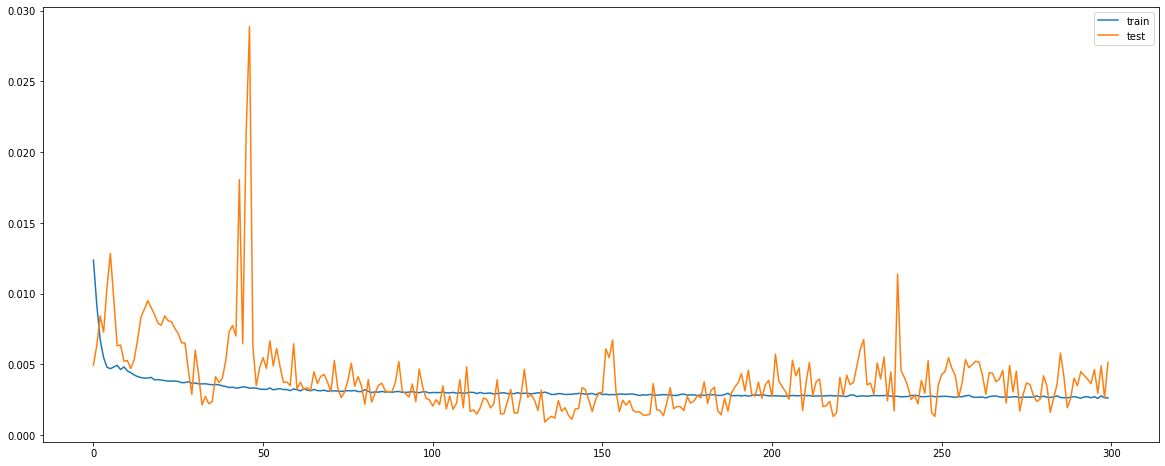

In [77]:
plt.figure(figsize=(20,8))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

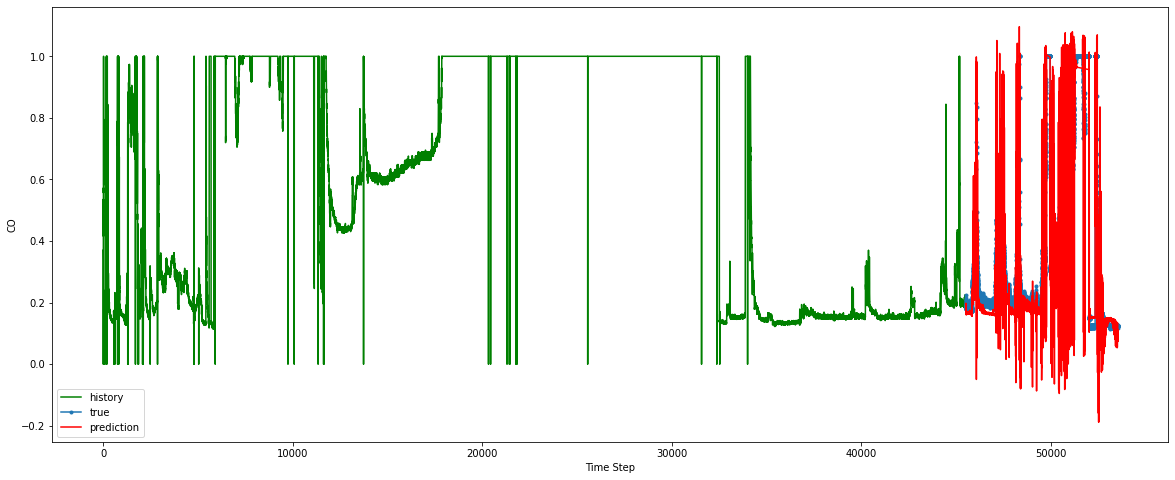

In [78]:
y_pred = model.predict(X_test)
y_train_inv = cnt_transformer.inverse_transform(y_train.reshape(1, -1))
y_test_inv = cnt_transformer.inverse_transform(y_test.reshape(1, -1))
y_pred_inv = cnt_transformer.inverse_transform(y_pred)
plt.figure(figsize=(20,8))
plt.plot(np.arange(0, len(y_train)), y_train_inv.flatten(), 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('CO')
plt.xlabel('Time Step')
plt.legend()
plt.show();

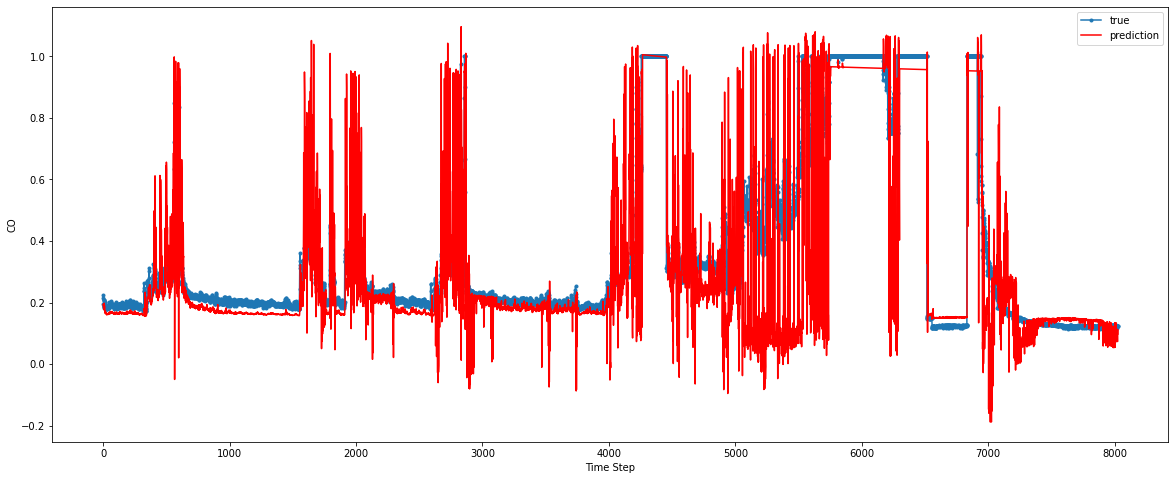

In [79]:
plt.figure(figsize=(20,8))
plt.plot(y_test_inv.flatten(), marker='.', label="true")
plt.plot(y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('CO')
plt.xlabel('Time Step')
plt.legend()
plt.show();

In [81]:
model.save('models/CH4/CH4_lstm.h5')

In [82]:
import pickle
output = open('encoders/CH4_encoder.pkl', 'wb')
pickle.dump(scale, output)
output.close()

# ARIME Model

In [83]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

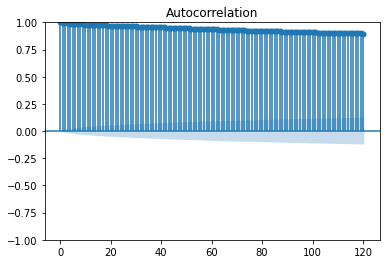

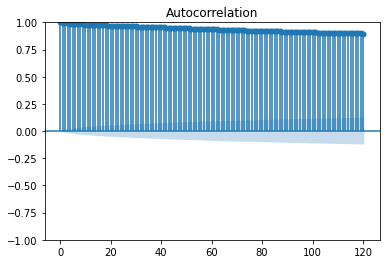

In [85]:
plot_acf(df.CH4.values, lags=120)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


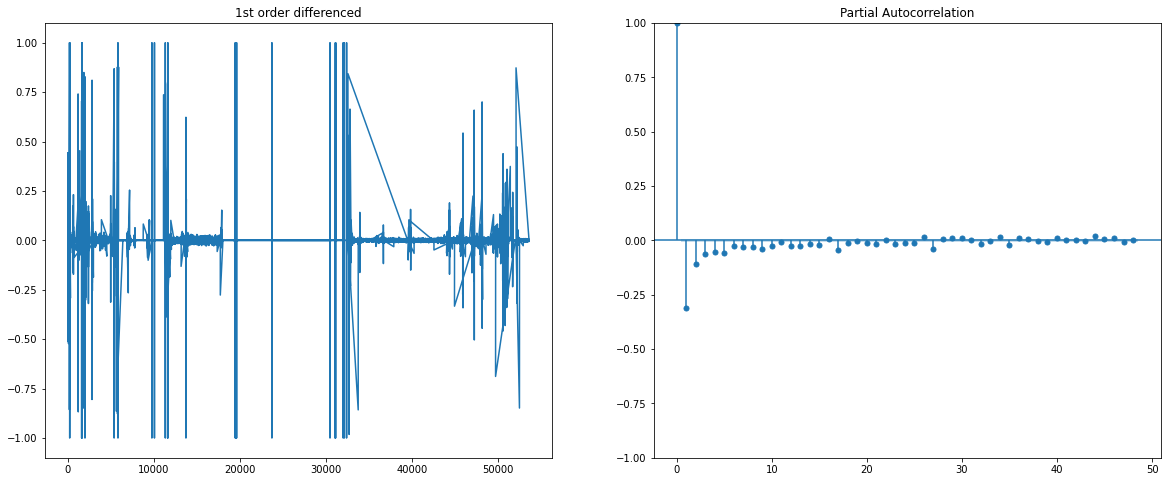

In [86]:
f=plt.figure(figsize=(20,8))
ax1=f.add_subplot(121)
ax1.set_title('1st order differenced')
ax1.plot(df.CH4.diff())
ax2=f.add_subplot(122)
plot_pacf(df.CH4.diff().dropna(), ax=ax2)
plt.show()

In [87]:
df.set_index('DateTime', inplace=True)

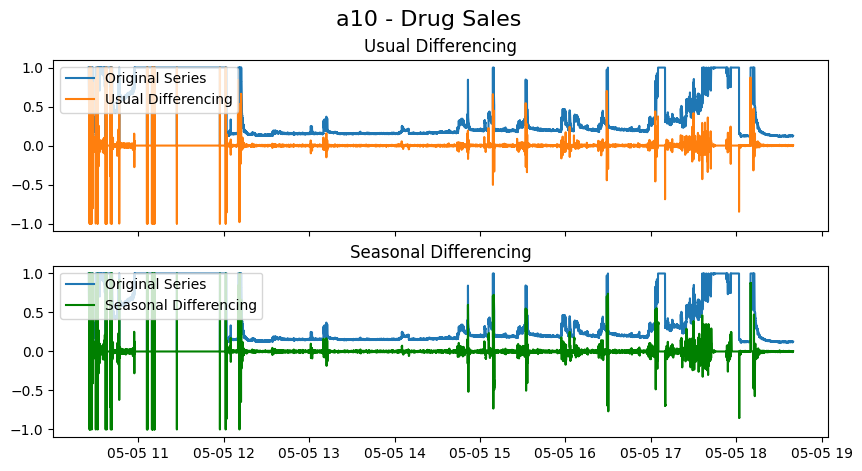

In [88]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(df[:], label='Original Series')
axes[0].plot(df[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
axes[1].plot(df[:], label='Original Series')
axes[1].plot(df[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('a10 - Drug Sales', fontsize=16)
plt.show()

In [89]:
# Seasonal - fit stepwise auto-ARIMA
import pmdarima as pm
smodel = pm.auto_arima(df, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=170.46 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-118065.297, Time=8.35 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-174135.725, Time=72.64 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-150627.377, Time=70.49 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-118067.245, Time=6.91 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=-159874.000, Time=10.07 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=-180034.439, Time=240.39 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=342.54 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=135.32 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=-122922.402, Time=77.73 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=-183245.803, Time=588.56 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=-176978.297, Time=91.08 sec
